This is our regression project, we need to predict the final mark(G3) of a student in the math

subject( from 0 to 20 ), your task is to design a predictive model to predict the mark.

The description of the dataset can be found in this link:

https://archive.ics.uci.edu/ml/datasets/Student+Performance

You may face a problem in reading the csv file, if you do find problems, then I will give the answer
tomorrow( Thursday ), but people who can not discover how to read the CSV will lose 5 marks out of 100.

please follow this configuration:

1) all random sate and seed should be (1): random_state=1, seed=1.

2) splits is 0.2( as a standard).

3) The deadline is on Saturday at 11 night.

4) Groups:

1) Jihad + May

2) Noura

3) Obaidah

4) Samer

5) Shaima

6) Razan + Dania

7) Ghazaleh

8) Shaima

9) Shrouq



# Regression task

#### We need to predict the final mark(G3) of a student in the math subject

# Step1

#### All the libraries we will need in our project

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sb 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import RidgeCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import RFECV
from math import sqrt


# Step2
### load the students dataset into memory

In [2]:
student_data=pd.read_csv("student-mat.csv",sep=';')
print ("Student data read successfully!")
#dataset.head(10)
print('The shape of the data:',student_data.shape)

Student data read successfully!
The shape of the data: (395, 33)


In [3]:
student_data.head(10)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
5,GP,M,16,U,LE3,T,4,3,services,other,...,5,4,2,1,2,5,10,15,15,15
6,GP,M,16,U,LE3,T,2,2,other,other,...,4,4,4,1,1,3,0,12,12,11
7,GP,F,17,U,GT3,A,4,4,other,teacher,...,4,1,4,1,1,1,6,6,5,6
8,GP,M,15,U,LE3,A,3,2,services,other,...,4,2,2,1,1,1,0,16,18,19
9,GP,M,15,U,GT3,T,3,4,other,other,...,5,5,1,1,1,5,0,14,15,15


In [4]:
student_data.describe()


,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [4]:
student_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

# Step3
### Check whether the dataset has missing information

#### The data has no missing values.

In [25]:
student_data.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

# Step4 
# Data Exploration

#### First, we will take a general idea about the values we have.

In [26]:
featurecount=0
for col, col_data in student_data.iteritems():
        # View the features that need encoding
        #if col_data.dtype == object:
            print(student_data[col].value_counts()) 
            print('------------',featurecount,'---------------')
            featurecount+=1

GP    349
MS     46
Name: school, dtype: int64
------------ 0 ---------------
F    208
M    187
Name: sex, dtype: int64
------------ 1 ---------------
16    104
17     98
18     82
15     82
19     24
20      3
22      1
21      1
Name: age, dtype: int64
------------ 2 ---------------
U    307
R     88
Name: address, dtype: int64
------------ 3 ---------------
GT3    281
LE3    114
Name: famsize, dtype: int64
------------ 4 ---------------
T    354
A     41
Name: Pstatus, dtype: int64
------------ 5 ---------------
4    131
2    103
3     99
1     59
0      3
Name: Medu, dtype: int64
------------ 6 ---------------
2    115
3    100
4     96
1     82
0      2
Name: Fedu, dtype: int64
------------ 7 ---------------
other       141
services    103
at_home      59
teacher      58
health       34
Name: Mjob, dtype: int64
------------ 8 ---------------
other       217
services    111
teacher      29
at_home      20
health       18
Name: Fjob, dtype: int64
------------ 9 ---------------
cours

### View the features with categorical data

In [27]:
featurecount=0
for col, col_data in student_data.iteritems():
        # View the features that need encoding
        if col_data.dtype == object:
            print(student_data[col].value_counts()) 
            print('------------',featurecount,'---------------')
            featurecount+=1

GP    349
MS     46
Name: school, dtype: int64
------------ 0 ---------------
F    208
M    187
Name: sex, dtype: int64
------------ 1 ---------------
U    307
R     88
Name: address, dtype: int64
------------ 2 ---------------
GT3    281
LE3    114
Name: famsize, dtype: int64
------------ 3 ---------------
T    354
A     41
Name: Pstatus, dtype: int64
------------ 4 ---------------
other       141
services    103
at_home      59
teacher      58
health       34
Name: Mjob, dtype: int64
------------ 5 ---------------
other       217
services    111
teacher      29
at_home      20
health       18
Name: Fjob, dtype: int64
------------ 6 ---------------
course        145
home          109
reputation    105
other          36
Name: reason, dtype: int64
------------ 7 ---------------
mother    273
father     90
other      32
Name: guardian, dtype: int64
------------ 8 ---------------
no     344
yes     51
Name: schoolsup, dtype: int64
------------ 9 ---------------
yes    242
no     153
Name:

# Step 5-Encoding categorical features

#### The features that have binary values we will give them zero and one, nominal features we will encoding them using get dummies

In [3]:
def preprocess_features(X):
    ''' Preprocesses the student data and converts non-numeric binary variables into
        binary (0/1) variables. Converts categorical variables into dummy variables. '''
    replacements = { "yes": 1, "no": 0, "GP": 1,  "MS":0,   "F":1,   "M":0, "U":1,"R":0, "T":1, "A":0,"GT3":1,"LE3":0 }

        
    # Initialize new output DataFrame
    output = pd.DataFrame(index = X.index)

    # Investigate each feature column for the data
    for col, col_data in X.iteritems():
        
        # If data type is non-numeric, replace all yes/no values with 1/0
        if col_data.dtype == object:
            col_data.replace(replacements, inplace=True)  
               
        # If data type is categorical, convert to dummy variables
        if col_data.dtype == object:
            # Example: 'school' => 'school_GP' and 'school_MS'
            col_data = pd.get_dummies(col_data, prefix = col)  
                
        #print(col_data)
        # Collect the revised columns
        output = output.join(col_data)
    
    return output

student_data = preprocess_features(student_data)
student_data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob_at_home,Mjob_health,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,1,1,18,1,1,0,4,4,1,0,...,4,3,4,1,1,3,6,5,6,6
1,1,1,17,1,1,1,1,1,1,0,...,5,3,3,1,1,3,4,5,5,6
2,1,1,15,1,0,1,1,1,1,0,...,4,3,2,2,3,3,10,7,8,10
3,1,1,15,1,1,1,4,2,0,1,...,3,2,2,1,1,5,2,15,14,15
4,1,1,16,1,1,1,3,3,0,0,...,4,3,2,1,2,5,4,6,10,10


# Step6: Detecting outliers and delete them

In [4]:
Q1 = np.quantile(student_data['absences'],0.25)
Q3 = np.quantile(student_data['absences'],0.75)
IQR = Q3 - Q1
L= Q1 - 1.5*IQR 
U= Q3 + 1.5*IQR
for element in range(len(student_data['absences'])):
    student_data=student_data[(student_data["absences"]>=L)&(student_data["absences"]<=U)]

In [9]:
student_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 380 entries, 0 to 394
Data columns (total 46 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   school             380 non-null    int64
 1   sex                380 non-null    int64
 2   age                380 non-null    int64
 3   address            380 non-null    int64
 4   famsize            380 non-null    int64
 5   Pstatus            380 non-null    int64
 6   Medu               380 non-null    int64
 7   Fedu               380 non-null    int64
 8   Mjob_at_home       380 non-null    uint8
 9   Mjob_health        380 non-null    uint8
 10  Mjob_other         380 non-null    uint8
 11  Mjob_services      380 non-null    uint8
 12  Mjob_teacher       380 non-null    uint8
 13  Fjob_at_home       380 non-null    uint8
 14  Fjob_health        380 non-null    uint8
 15  Fjob_other         380 non-null    uint8
 16  Fjob_services      380 non-null    uint8
 17  Fjob_teacher    

### Normalizing age and absence feature increased the R-square results with me

In [5]:
from sklearn.preprocessing import MinMaxScaler
scaler= MinMaxScaler()
scaler.fit(student_data[['age']])
student_data['norm_age'] = scaler.transform(student_data[['age']])
student_data=student_data.drop(["age"],axis=1)
student_data.head()

,school,sex,address,famsize,Pstatus,Medu,Fedu,Mjob_at_home,Mjob_health,Mjob_other,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,norm_age
0,1,1,1,1,0,4,4,1,0,0,...,3,4,1,1,3,6,5,6,6,0.428571
1,1,1,1,1,1,1,1,1,0,0,...,3,3,1,1,3,4,5,5,6,0.285714
2,1,1,1,0,1,1,1,1,0,0,...,3,2,2,3,3,10,7,8,10,0.000000
3,1,1,1,1,1,4,2,0,1,0,...,2,2,1,1,5,2,15,14,15,0.000000
4,1,1,1,1,1,3,3,0,0,1,...,3,2,1,2,5,4,6,10,10,0.142857


In [6]:
#from sklearn.preprocessing import MinMaxScaler
scaler= MinMaxScaler()
scaler.fit(student_data[['absences']])
student_data['norm_absences'] = scaler.transform(student_data[['absences']])
student_data=student_data.drop(["absences"],axis=1)
student_data.head()

,school,sex,address,famsize,Pstatus,Medu,Fedu,Mjob_at_home,Mjob_health,Mjob_other,...,freetime,goout,Dalc,Walc,health,G1,G2,G3,norm_age,norm_absences
0,1,1,1,1,0,4,4,1,0,0,...,3,4,1,1,3,5,6,6,0.428571,0.3
1,1,1,1,1,1,1,1,1,0,0,...,3,3,1,1,3,5,5,6,0.285714,0.2
2,1,1,1,0,1,1,1,1,0,0,...,3,2,2,3,3,7,8,10,0.000000,0.5
3,1,1,1,1,1,4,2,0,1,0,...,2,2,1,1,5,15,14,15,0.000000,0.1
4,1,1,1,1,1,3,3,0,0,1,...,3,2,1,2,5,6,10,10,0.142857,0.2


In [11]:
### Correlation matrix

In [7]:
student_data.corrwith(student_data['G3'],method="pearson")

school               0.046183
sex                 -0.112634
address              0.108147
famsize             -0.087783
Pstatus             -0.062844
Medu                 0.221206
Fedu                 0.151087
Mjob_at_home        -0.116636
Mjob_health          0.117462
Mjob_other          -0.090534
Mjob_services        0.065722
Mjob_teacher         0.065147
Fjob_at_home        -0.013870
Fjob_health          0.057611
Fjob_other          -0.049380
Fjob_services       -0.013045
Fjob_teacher         0.081371
reason_course       -0.105555
reason_home         -0.029977
reason_other         0.052365
reason_reputation    0.111440
guardian_father      0.022294
guardian_mother      0.031712
guardian_other      -0.090828
traveltime          -0.117953
studytime            0.101594
failures            -0.365408
schoolsup           -0.079492
famsup              -0.052352
paid                 0.112540
activities           0.021119
nursery              0.053528
higher               0.186115
internet  

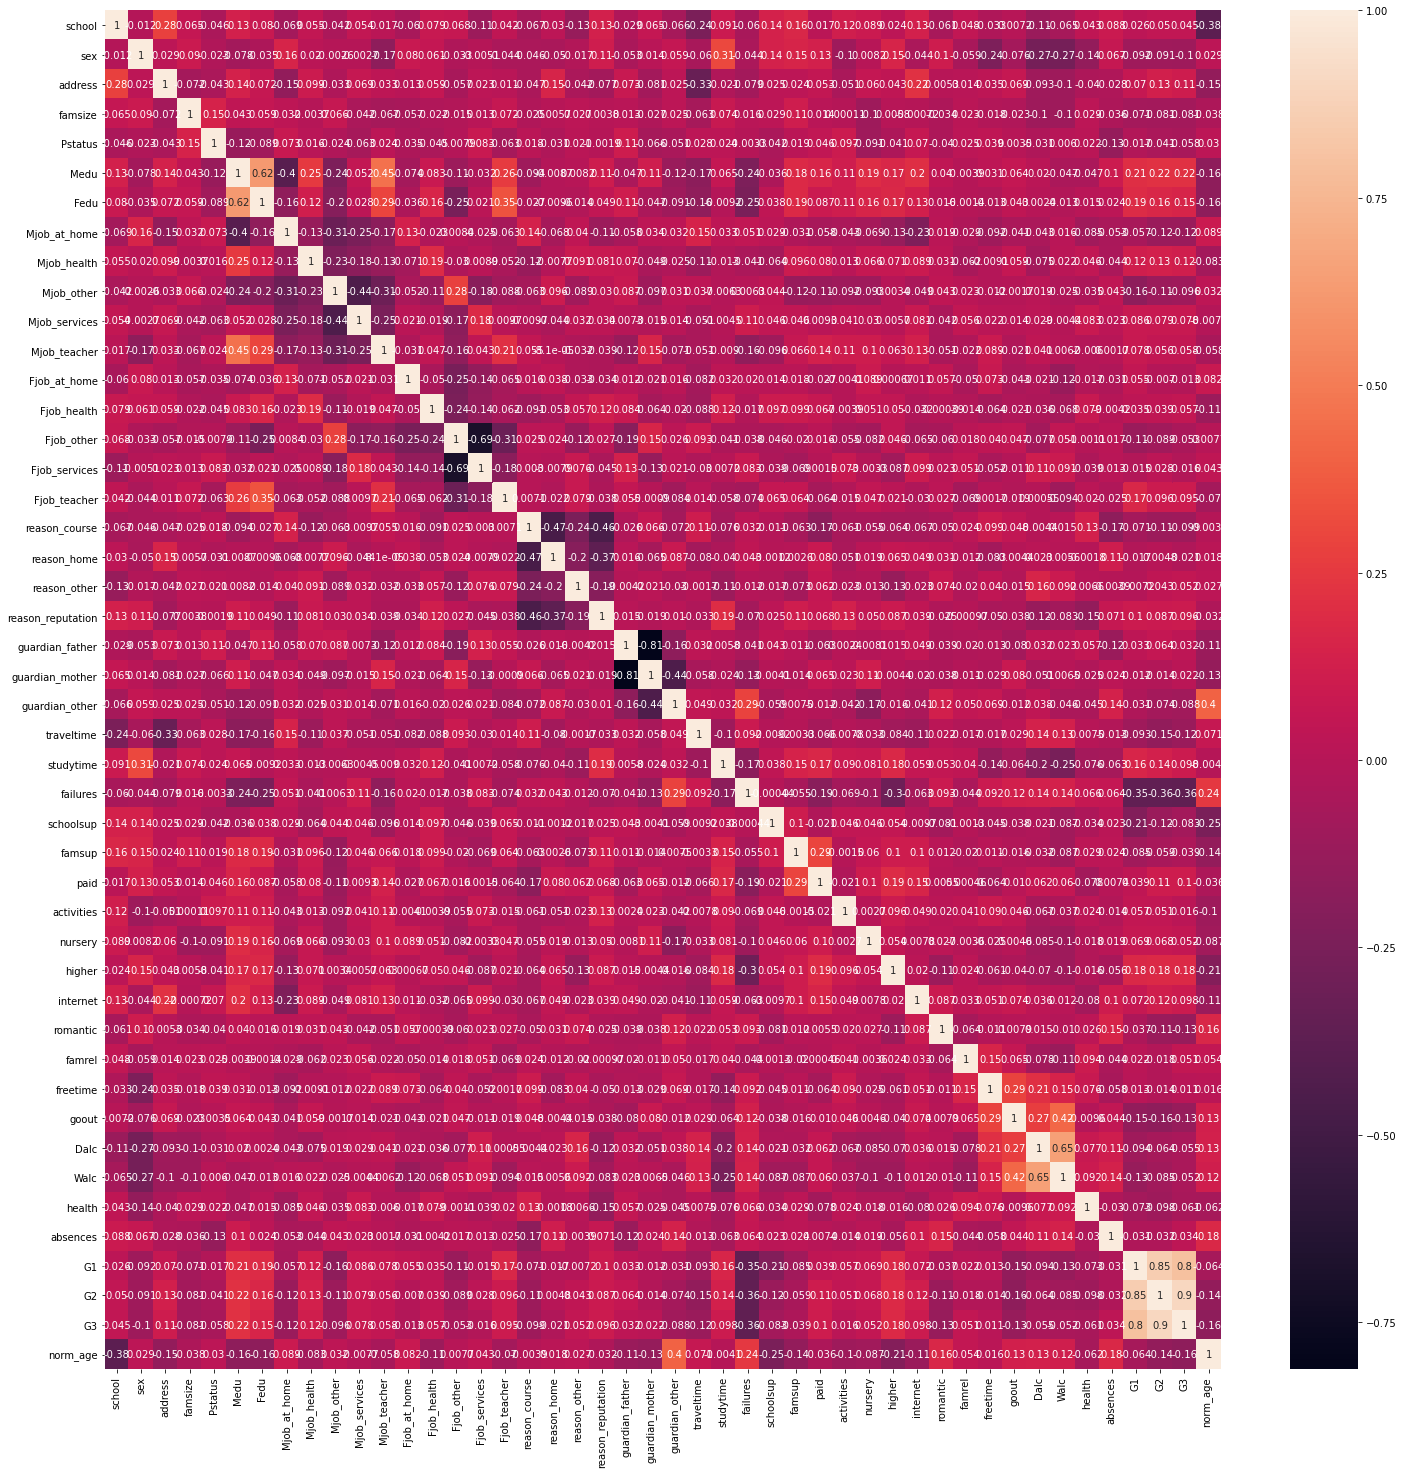

In [11]:
plt.figure(figsize=(25,25))
cor=student_data.corr()
sb.heatmap(cor,annot=True)

## Identifying feature and target columns

In [8]:
# Extract feature columns
X = student_data.drop(columns=['G3'])
# Extract target column
Y = student_data.G3
print('features shape:',X.shape,'target shape:', Y.shape)

features shape: (380, 45) target shape: (380,)


In [14]:
X.head(2)

,school,sex,address,famsize,Pstatus,Medu,Fedu,Mjob_at_home,Mjob_health,Mjob_other,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,norm_age
0,1,1,1,1,0,4,4,1,0,0,...,4,3,4,1,1,3,6,5,6,0.428571
1,1,1,1,1,1,1,1,1,0,0,...,5,3,3,1,1,3,4,5,5,0.285714


In [13]:
Y.head()

0     6
1     6
2    10
3    15
4    10
Name: G3, dtype: int64

## Data distributions

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000017F77D3F640>,
        ...,
        ...,
        ...,
       ...,
        ...,
        ...,
        ...,
      dtype=object)

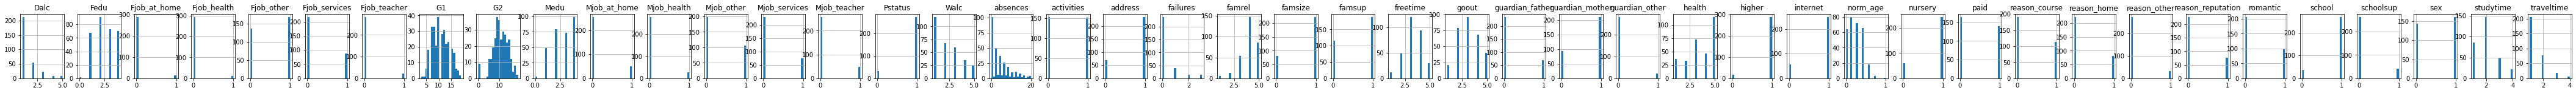

In [27]:

r=1
np.random.seed(r)
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=r)
X_train.hist(figsize=(100,50),layout=(20,60),bins=20)

In [18]:
X.describe()

,school,sex,address,famsize,Pstatus,Medu,Fedu,Mjob_at_home,Mjob_health,Mjob_other,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,norm_age
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,...,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,0.883544,0.526582,0.777215,0.711392,0.896203,2.749367,2.521519,0.149367,0.086076,0.356962,...,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,0.242315
std,0.321177,0.499926,0.416643,0.453690,0.305384,1.094735,1.088201,0.356902,0.280832,0.479711,...,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,0.182292
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,1.000000,0.000000,1.000000,0.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,...,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,0.142857
50%,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,2.000000,0.000000,0.000000,0.000000,...,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,0.285714
75%,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000,3.000000,0.000000,0.000000,1.000000,...,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,0.428571
max,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000,4.000000,1.000000,1.000000,1.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,1.000000


# Step6 - Model selection and evaluation
#### First, we will automate hyperparameter tuning and out of sample testing using train_model below

In [9]:
def train_model(rm, X, Y):
    '''Trains and evaluates the model rm from input
    
    The function selects the best model of rm by optimizing for the validation data,
    then evaluates its performance using the out of sample test data.
    
    input - rm: the model to train
            X: features
            Y: labels
    
    output - the best estimator (trained model)
    '''
    r=1
    np.random.seed(r)
    #First, partition into train and test data
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=r)
    score_r2 = cross_val_score(rm, X, Y, scoring='r2')
    score_NMSE = cross_val_score(rm, X, Y, scoring='neg_mean_squared_error')
    
    model=rm.fit(X_train,Y_train)

    predict=model.predict(X_test)

    predict2=model.predict(X_train)

    score_MSE  = mean_squared_error(Y_test,predict)
    RMSE =  sqrt ( mean_squared_error(Y_test,predict))
    r2_ytest= r2_score(Y_test,predict)
    r2_ytrain= r2_score(Y_train,predict2)

   
    
    
   
    return {
         'CrossValidation R2':score_r2.mean(), 
         'CrossValidation NMSE':score_NMSE.mean(), 
         'MSE':score_MSE,
         'RMSE': RMSE,
         'test data R2':r2_ytest,
         'train data R2':r2_ytrain
    }

In [10]:
Regression_results = pd.DataFrame(columns=['CrossValidation R2','CrossValidation NMSE','MSE','RMSE','test data R2','train data R2'])

#### Then, we will use the train_model function to train, optimize and retrieve out of sample testing results from a range of models.
###### 1.lasso
###### 2.LinearRegression
###### 3.Ridge
###### 4.RandomForestRegressor
###### 5.AdaBoostRegressor
###### 6.DecisionTreeRegressor
###### 7.RidgeCV


In [11]:
def create_regression_inputs():
    
    Regression_inputs = {}
    
    
    
    Regression_inputs[' Lasso'] = {
        'model':Lasso(alpha=0.05)
        }

    Regression_inputs[' LinearRegression'] = {
        'model':LinearRegression()
    }
    Regression_inputs['Ridge'] = {
        'model':Ridge(alpha=0.05)
        }
    
    Regression_inputs[' RandomForestRegressor'] = {
        'model':RandomForestRegressor(random_state=r, n_jobs=-1)
    }
    
    Regression_inputs['AdaBoostRegressor'] = {
        'model':AdaBoostRegressor(random_state=r, n_estimators=140, learning_rate=0.4),
        
    }
    Regression_inputs['DecisionTreeRegressor'] = {
        'model':DecisionTreeRegressor()
    }
    
    Regression_inputs['RidgeCV'] = {
        'model':RidgeCV(alphas=a)

    }

    return Regression_inputs


#### Call train model function and the results 

In [12]:
Regression_inputs = {}
r=1
np.random.seed(r)
a=np.linspace(0.1,100,50)

#Get regressions and parameters to optimize
Regression_inputs.update(create_regression_inputs( ))

#Call train_model for every Regression and save results to Regression_results
for Regression_name, inputs in Regression_inputs.items():
    if Regression_name in Regression_results.index.values.tolist():
        print('Skipping ' + Regression_name + ', already trained')
    else:
        result_dict = train_model(inputs['model'],X,Y)
        Regression_results.loc[Regression_name] = result_dict
        
Regression_results = Regression_results.sort_values(['test data R2','train data R2','CrossValidation R2'], ascending=[False,False,False])


,CrossValidation R2,CrossValidation NMSE,MSE,RMSE,test data R2,train data R2
RandomForestRegressor,0.836177,-3.359855,1.097254,1.047499,0.942414,0.979759
DecisionTreeRegressor,0.634859,-7.200000,2.039474,1.428101,0.892964,1.000000
RidgeCV,0.808193,-3.953374,2.048447,1.431240,0.892493,0.823086
Lasso,0.811678,-3.874158,2.056071,1.433900,0.892093,0.828984
AdaBoostRegressor,0.818363,-3.652438,2.240168,1.496719,0.882431,0.909283
Ridge,0.792272,-4.240004,2.714253,1.647499,0.857550,0.843272
LinearRegression,0.792151,-4.242210,2.719853,1.649198,0.857256,0.843271


In [13]:
Regression_results = Regression_results.sort_values(['test data R2','train data R2'], ascending=[False,False])
display(Regression_results)

,CrossValidation R2,CrossValidation NMSE,MSE,RMSE,test data R2,train data R2
RandomForestRegressor,0.836177,-3.359855,1.097254,1.047499,0.942414,0.979759
DecisionTreeRegressor,0.634859,-7.200000,2.039474,1.428101,0.892964,1.000000
RidgeCV,0.808193,-3.953374,2.048447,1.431240,0.892493,0.823086
Lasso,0.811678,-3.874158,2.056071,1.433900,0.892093,0.828984
AdaBoostRegressor,0.818363,-3.652438,2.240168,1.496719,0.882431,0.909283
Ridge,0.792272,-4.240004,2.714253,1.647499,0.857550,0.843272
LinearRegression,0.792151,-4.242210,2.719853,1.649198,0.857256,0.843271


## Step7-recursive feature elimination and cross-validation

In [14]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=r)

randomforest = RandomForestRegressor(random_state=0, n_jobs=-1)
rf=RFECV(estimator=randomforest,step=1,scoring="neg_mean_squared_error")

rf.fit(X_train,Y_train)
rf.transform(X_train)

print(rf.support_)


[False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False  True  True  True  True  True]


### Extract Optimal Features from Recursive Feature Elimination (RFECV)


In [16]:
f = rf.get_support(1) #the most important features
X_hope = X[X.columns[f]] # final features`

In [17]:
X_hope.head()

,health,G1,G2,norm_age,norm_absences
0,3,5,6,0.428571,0.3
1,3,5,5,0.285714,0.2
2,3,7,8,0.000000,0.5
3,5,15,14,0.000000,0.1
4,5,6,10,0.142857,0.2


In [18]:
Regression_results_RFECV = pd.DataFrame(columns=['CrossValidation R2','CrossValidation NMSE','MSE','RMSE','test data R2','train data R2'])

### Models after doing  recursive feature elimination and cross-validation
##### CV r-square increased

In [19]:
Regression_inputs = {}
r=1
np.random.seed(r)
a=np.linspace(0.1,100,50)

#Get regressions and parameters to optimize
Regression_inputs.update(create_regression_inputs( ))

#Call train_model for every Regression and save results to Regression_results
for Regression_name, inputs in Regression_inputs.items():
    if Regression_name in Regression_results_RFECV.index.values.tolist():
        print('Skipping ' + Regression_name + ', already trained')
    else:
        result_dict = train_model(inputs['model'],X,Y)
        Regression_results_RFECV.loc[Regression_name] = result_dict

Regression_results_RFECV = Regression_results_RFECV.sort_values(['test data R2','train data R2'], ascending=[False,False])
display(Regression_results_RFECV)

,CrossValidation R2,CrossValidation NMSE,MSE,RMSE,test data R2,train data R2
RandomForestRegressor,0.836177,-3.359855,1.097254,1.047499,0.942414,0.979759
DecisionTreeRegressor,0.634859,-7.200000,2.039474,1.428101,0.892964,1.000000
RidgeCV,0.808193,-3.953374,2.048447,1.431240,0.892493,0.823086
Lasso,0.811678,-3.874158,2.056071,1.433900,0.892093,0.828984
AdaBoostRegressor,0.818363,-3.652438,2.240168,1.496719,0.882431,0.909283
Ridge,0.792272,-4.240004,2.714253,1.647499,0.857550,0.843272
LinearRegression,0.792151,-4.242210,2.719853,1.649198,0.857256,0.843271


### plot a graph showing RidgeCV scores

In [22]:
a=np.linspace(0.1,100,50)
regcv = RidgeCV(alphas=a)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=r)
model=regcv.fit(X_train,Y_train)
predict=model.predict(X_test)

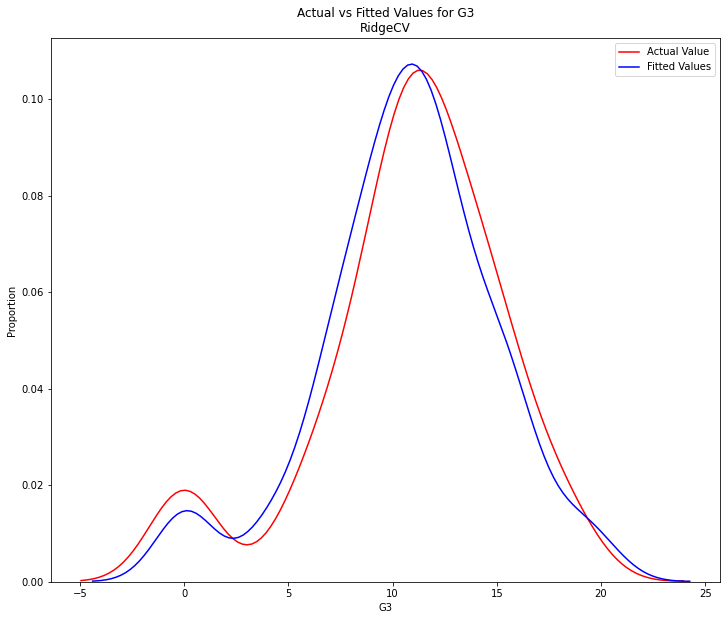

In [24]:
plt.figure(figsize=(12, 10))


ax1 = sb.distplot(Y_test, hist=False, color="r", label="Actual Value")
sb.distplot(predict, hist=False, color="b", label="Fitted Values" , ax=ax1)

plt.title('Actual vs Fitted Values for G3\nRidgeCV')
plt.xlabel('G3')
plt.ylabel('Proportion')

plt.show()
plt.close()
